# Getting started with Fermat
 
This notebook introduces the basic concepts in order to compute Fermat distance using the Fermat package.

We use a toy data set (the swiss roll) in order to illustrate. 

 **Contents**:
        
    - Data generation
    - Computing Fermat distance
    - Visualization using t-sne
    

In [1]:
import numpy as np
from scipy.spatial import  distance_matrix
from sklearn.manifold import TSNE

import matplotlib.pyplot as plt

from generate_data import generate_swiss_roll

In [5]:
import os
import sys
sys.path.append(os.path.dirname(get_ipython().starting_dir))

In [6]:
from fermat import Fermat

In [7]:
help(Fermat)

Help on class Fermat in module fermat.Fermat:

class Fermat(sklearn.base.BaseEstimator)
 |  Base class for all estimators in scikit-learn
 |  
 |  Notes
 |  -----
 |  All estimators should specify all the parameters that can be set
 |  at the class level in their ``__init__`` as explicit keyword
 |  arguments (no ``*args`` or ``**kwargs``).
 |  
 |  Method resolution order:
 |      Fermat
 |      sklearn.base.BaseEstimator
 |      builtins.object
 |  
 |  Methods defined here:
 |  
 |  __init__(self, alpha, path_method='L', k=None, landmarks=None, estimator='up', seed=None)
 |      Parameters
 |      -----------
 |      alpha: float
 |          Parameter of the Fermat distance.
 |      
 |      path_method: string ['FW','D','L']
 |      
 |          Options are:
 |      
 |                  'FW'    -- Computes the exact Fermat distance using the Floyd-Warshall algorithm. The complexity is
 |                           O[N^3] where N is the number of data points.
 |      
 |             

## Data generation

Generate the Swiss Roll data set.

In [9]:
data, labels = generate_swiss_roll(oscilations = 15, a = 3, n = 250)
print('Data dimension:{}'.format(data.shape))

Data dimension:(1000, 3)



Visualize the data

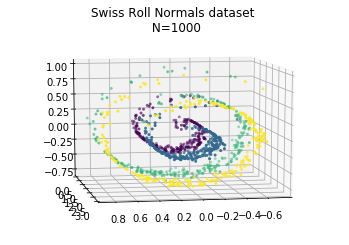

In [10]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure()

ax = fig.add_subplot(111, projection='3d')
ax.view_init(10, 80)
ax.scatter(xs=data[:,0], ys=data[:,1], zs=data[:,2], c=labels, s=4)
plt.title('Swiss Roll Normals dataset \n N=%s'%(data.shape[0]))

plt.show()

Compute euclidean distances between points in the data set

In [11]:
distances = distance_matrix(data,data)

## Computing Fermat-Distances

Parameters

In [12]:
alpha = 3

k = 100 
landmarks = 30

#### Exact method: computes all the pairwise Fermat distances in an exact way 


In [13]:
%%time

# Initialize the model
f_exact = Fermat(alpha = alpha, path_method='FW') 

# Fit
f_exact.fit(distances)

CPU times: user 1.1 s, sys: 16 ms, total: 1.11 s
Wall time: 1.11 s


Fermat(alpha=3, estimator='up', k=None, landmarks=None, path_method='FW',
       seed=None)

In [14]:
fermat_dist_exact = f_exact.get_distances() 

#### Aprox method 1: using k-nearest neighbours

In [16]:
%%time

# Initialize Fermat model
f_aprox_D = Fermat(alpha, path_method='D', k=k) 

# Fit
f_aprox_D.fit(distances)

CPU times: user 1.3 s, sys: 4 ms, total: 1.3 s
Wall time: 1.3 s


Fermat(alpha=3, estimator='up', k=100, landmarks=None, path_method='D',
       seed=None)

In [17]:
fermat_dist_aprox_D = f_aprox_D.get_distances()

#### Aprox method 2: using landmarks and k-nearest neighbours 

In [19]:
%%time

# Initialize Fermat model
f_aprox_L = Fermat(alpha, path_method='L', k=k, landmarks=landmarks) 

# Fit
f_aprox_L.fit(distances)

CPU times: user 588 ms, sys: 0 ns, total: 588 ms
Wall time: 583 ms


Fermat(alpha=3, estimator='up', k=100, landmarks=30, path_method='L', seed=None)

In [20]:
%%time
fermat_dist_aprox_L = f_aprox_L.get_distances() 

CPU times: user 22.5 s, sys: 0 ns, total: 22.5 s
Wall time: 22.5 s


## Visualization

Visualization for the Fermat distances using t-SNE

In [21]:
tsne_model = TSNE(n_components=2, verbose=0, perplexity=50, n_iter=500)
tsnes = tsne_model.fit_transform(fermat_dist_exact)

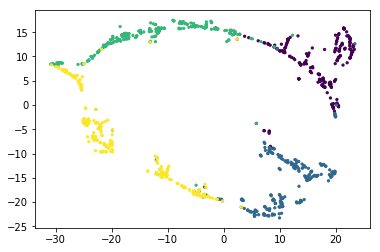

In [22]:
plt.scatter(tsnes[:,0],tsnes[:,1], c = labels, s = 5)